In [1]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib


import os,sys
from importlib import reload
import copy
sys.path.append("../tracker")

In [109]:
import kalmanfilter as KF
import utilities as Util
import trackfinder as TF
import datatypes
from datatypes import *

reload(TF)
reload(Util)

<module 'utilities' from '../tracker\\utilities.py'>

In [ ]:
steel_height=0.03 #m
Box_IP_Depth=85.47#m
def coord_det2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """
    return np.array([vector_xyz[0]+119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_sim2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """
    return np.array([vector_xyz[1],      -vector_xyz[2]+Box_IP_Depth, vector_xyz[0]])*100 # turn to cm
def coord_det2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """    
    return coord_sim2cms(coord_det2sim(vector_xyz))

def coord_sim2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[0]-119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_cms2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return coord_sim2det(coord_cms2sim(vector_xyz))

def coord_cms2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[2],      vector_xyz[0], -vector_xyz[1]+Box_IP_Depth*100])/100 # turn to m    
    

In [121]:
events=joblib.load("events_example.joblib")
events[0][:10]


In [163]:
hits = events[1]

tf = TF.TrackFinder(method="greedy", debug=True)
tf.parameters["cut_track_HitAddChi2"]=15
tf.parameters["cut_track_HitDropChi2"]=8
tf.parameters["cut_track_HitProjectionSigma"]=10
tf.parameters["cut_track_TrackChi2Reduced"]=5
tf.parameters["cut_track_TrackNHitsMin"]=3
tf.parameters["fit_track_MultipleScattering"]=False


hits_grouped = Util.track.group_hits_by_layer(hits)
hits_found,chi2_found = tf.find_once(hits, hits_grouped, [39,42,12])
hits_found,chi2_found


  Hit found: Hit(x=-160.25, y=9975.599999999999, z=13850.621504197721, t=45.21918763480031, x_err=1.299038105676658, y_err=0, z_err=14.132352000025548, t_err=1, layer=3, ind=39) ; chi2 0.0
  Hit found: Hit(x=-643.5091737716109, y=10057.2, z=13690.75, t=43.96450284944211, x_err=1.299038105676658, y_err=0, z_err=14.132352000025548, t_err=1, layer=4, ind=65) ; chi2 182.27640353545868


([], [])

In [168]:
reload(TF)

<module 'trackfinder' from '../tracker\\trackfinder.py'>

In [171]:
# tf = TF.TrackFinder(method="recursive", debug=False)
tf = TF.TrackFinder(method="greedy", debug=False)
tf.parameters["cut_track_HitAddChi2"]=12
tf.parameters["cut_track_HitDropChi2"]=12
tf.parameters["cut_track_HitProjectionSigma"]=7
tf.parameters["cut_track_TrackChi2Reduced"]=4
tf.parameters["cut_track_TrackNHitsMin"]=3
tf.parameters["fit_track_MultipleScattering"]=True
# %timeit -n 3 tf.run(hits)
tracks = tf.run(hits)
print(len(tracks))
joblib.dump(tracks, "tracks_example.joblib")
    

8


['tracks_example.joblib']

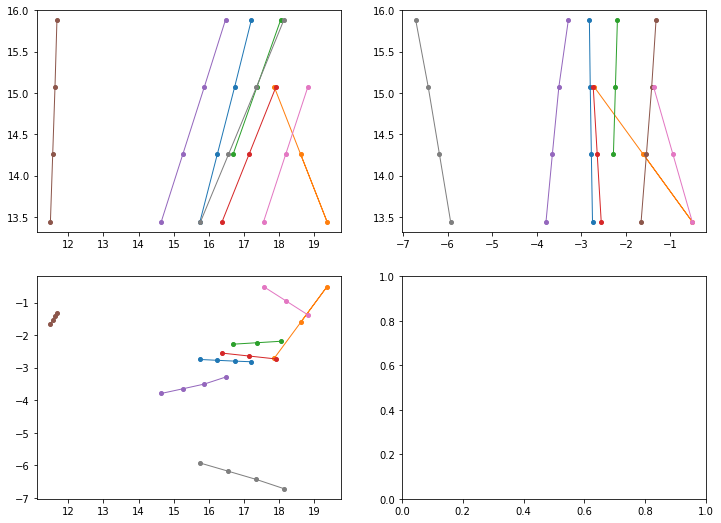

In [172]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label=track_label)

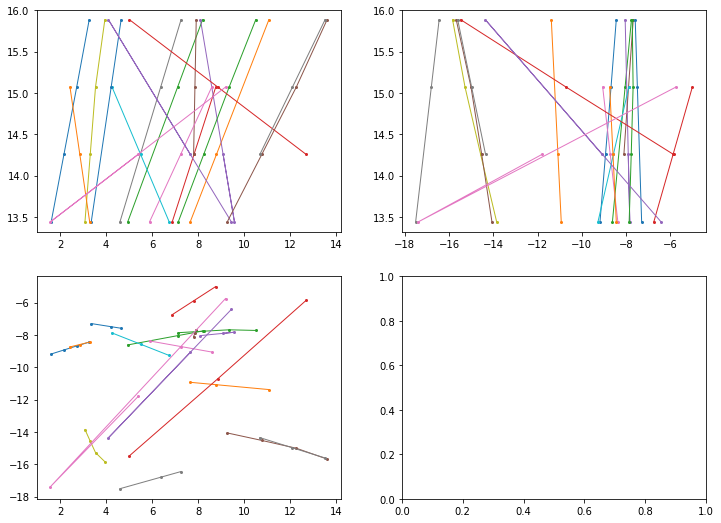

In [13]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=4,label=track_label)